### Day 2 - Customer's Profile [Fritzi] 

#### SUMMARY
##### What’s the primary profile of Vanguard's clients?
- The majority of clients (50%) have been with Vanguard for 6 to 16 years.
- On average, clients have been with Vanguard for approximately 12 years.
- The most common relationship length (mode) is 6 years.

- The gender distribution among clients is relatively balanced:
- 33.63% of clients are men.
- 32.47% of clients are women.
- 33.90% of clients have an unknown or undisclosed gender.

- The number of accounts ranges from a minimum of 1 to a maximum of 7.
- 80% of the clients hold 2 accounts with Vanguard.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association
import statsmodels.api as sm

%matplotlib inline

In [6]:
df = pd.read_csv("../data/clean/df_cleaned.csv")

In [8]:
df.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,visitor_id,visit_id,process_step,date_time
0,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:51:13
1,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:47:50
2,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:46:45
3,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,step_3,2017-04-02 11:23:08
4,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,step_2,2017-04-02 11:22:24


#### Task 1:

##### Check 'clnt_tenure_yr' (AND/OR 'clnt_tenure_mnth'):
- How long have people been clients with Vanguard?

##### Summary statistics:
- Mean
- Median
- Mode

##### Visualization:
- Histogram
- Boxplot

In [31]:
client_tenure_summary = df['clnt_tenure_yr'].describe()
print(client_tenure_summary)
print(f"Mode: {df['clnt_tenure_yr'].mode()[0]}")

count    321187.000000
mean         12.176576
std           6.963259
min           2.000000
25%           6.000000
50%          11.000000
75%          16.000000
max          55.000000
Name: clnt_tenure_yr, dtype: float64
Mode: 6.0


##### Sumary statistics
- The dataset includes a total of 321,187 clients.
- On average, clients have been with Vanguard for approximately 12 years.
- The median relationship length is 11 years, which is slightly lower than the mean, suggesting a skew in the data towards longer relationships.
- The most common relationship length (mode) is 6 years, indicating that a significant number of clients have been with Vanguard for a relatively short time. This highlights the presence of a smaller group of clients with exceptionally long relationships, which increases the mean.
- The range of relationship lengths is wide, spanning 53 years.
- The longest-standing client has been with Vanguard for 55 years, while the shortest relationship duration is 2 years.

Text(0.5, 0, 'Years as a Vanguard Client')

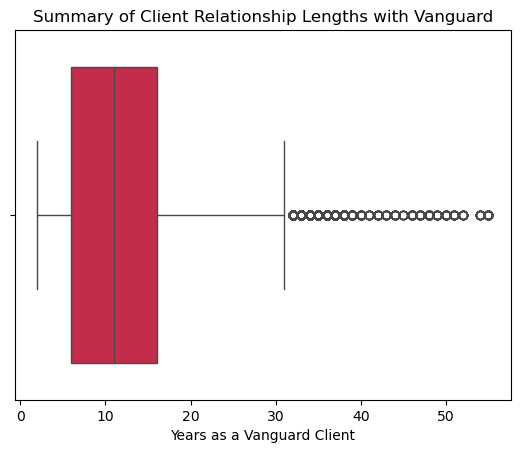

In [97]:
# Histogram of 'clnt_tenure_yr'

client_tenure_boxplot = sns.boxplot(x = df['clnt_tenure_yr'], color="crimson")
plt.title("Summary of Client Relationship Lengths with Vanguard")
plt.xlabel("Years as a Vanguard Client")

##### Boxplot visualizes IQR:
- The 1st quartile is 6 years.
- The 2nd quartile (or median) is  1 years.
- The 3rd quartile is 16 years.
- This indicates that the majority of clients (50%) have been with Vanguard for 6 to 16 years.
- The upper whisker extends to approx. 30 years.
- There are several outliers, representing clients who have been with Vanguard for more than 30 years, with the longest relationship reaching 55 years.00

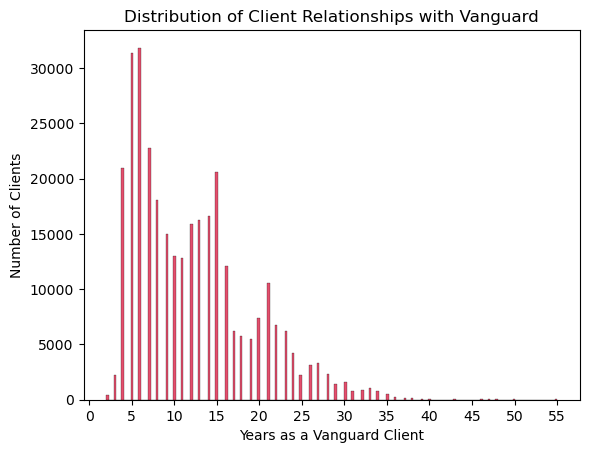

In [99]:
# Boxplot of 'clnt_tenure_yr'

client_tenure_histogram = sns.histplot(x = df['clnt_tenure_yr'], color="crimson")
plt.title("Distribution of Client Relationships with Vanguard")
plt.xlabel("Years as a Vanguard Client")
plt.ylabel('Number of Clients')
plt.xscale('linear')
plt.xticks(ticks=np.arange(0, 60, 5));

##### Histogram visualizes:
- The distribution of the length of client relationships with Vanguard.
- A distinct spike is observed at 5 and 6 years, representing the mode, indicating that these are the most common relationship lengths.
- Additional smaller spikes are noticeable at 15 and 21 years, suggesting periods where relatively more clients have joined and remained with Vanguard.

#### Task 2: 

##### Check 'gendr'
- Who are Vanguard clients? Is there a gender division?
##### Calculations & visualizations:
- Create frequency table in proportion
- Create pie chartt


In [188]:
# Frequency table

gender_distr = df['gendr'].value_counts()
index_names = ['Unknown', 'Male', 'Female']
gender_distr.index = index_names
gender_distr

Unknown    108884
Male       108013
Female     104290
Name: count, dtype: int64

In [160]:
# Frequency table by proportion

gender_distr_prop = df['gendr'].value_counts(normalize=True).round(4)
index_names = ['Unknown', 'Male', 'Female']
gender_distr_prop.index = index_names
gender_distr_prop = gender_distr_prop.sort_values(ascending=False)
gender_distr_prop

Unknown    0.3390
Male       0.3363
Female     0.3247
Name: proportion, dtype: float64

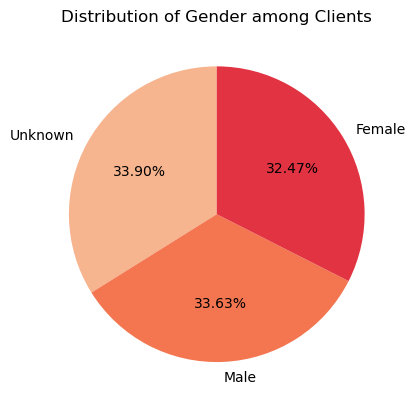

In [182]:
gender_distr_prop.plot.pie(autopct='%.2f%%', startangle=90, colors=sns.color_palette("rocket_r"), ylabel="")
plt.title("Distribution of Gender among Clients");

##### Pie chart:
- The gender distribution among clients is relatively balanced:
- 33.63% of clients are men.
- 32.47% of clients are women.
- 33.90% of clients have an unknown or undisclosed gender.

#### Task 3: 

##### Check 'num_accts'
- How many accounts do clients have?

##### Calculations & visualizations:
- Summary statistics
- Create frequency table
- Create countplot / barplot


In [248]:
# Change datatype from float to integer
df['num_accts'] = df['num_accts'].astype(int)
df['num_accts'].dtype

dtype('int32')

In [298]:
# Calculate summary statistics
no_of_accounts = df['num_accts'].describe()
no_of_accounts

count    321187.000000
mean          2.262968
std           0.541541
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           7.000000
Name: num_accts, dtype: float64

##### Summary statistics:
- On average, clients have 2.26 accounts.
- The number of accounts ranges from a minimum of 1 to a maximum of 7.
- The 1st quartile (Q1), median (Q2), and 3rd quartile (Q3) are all 2 accounts, indicating that the majority of clients hold exactly 2 accounts.

In [300]:
no_of_accounts_prop = (df['num_accts'].value_counts(normalize=True)*100).round(2).sort_index()
no_of_accounts_prop

num_accts
1     0.00
2    78.00
3    18.26
4     3.24
5     0.43
6     0.05
7     0.02
Name: proportion, dtype: float64

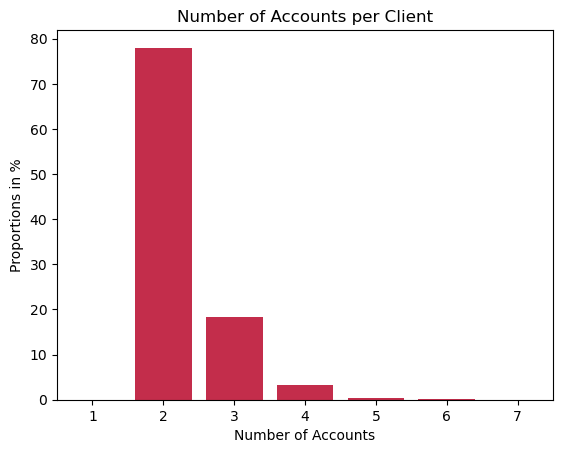

In [293]:
no_of_accounts_prop_plot = sns.barplot(no_of_accounts_prop, color="crimson")
no_of_accounts_prop_plot
plt.title("Number of Accounts per Client")
plt.ylabel("Proportions in %")
plt.xlabel("Number of Accounts");

##### Barplot:
- Nearly 80% of clients hold 2 accounts with Vanguard.
- Approx. 20% of clients have 3 accounts.
- A very small proportion of clients hold either 1 account or between 5 and 7 accounts.